In [96]:
import numpy as np
import pandas as pd

from ripser import ripser
from persim import plot_diagrams

from pathlib import Path

In [99]:
dhsic_filename = Path("./data/data_three_body/three_body_unstable_dhsic_joined.csv")
df = pd.read_csv(dhsic_filename)

In [100]:
df

,Unnamed: 0,r_1,v_1,r_2,v_2,r_3,v_3
0,0,1.315259e-11,8.117114e-01,7.382689e-01,8.160858e-01,6.653643e-01,7.759444e-01
1,1,8.117114e-01,1.511191e-11,6.076801e-01,7.426373e-01,6.486051e-01,7.723492e-01
2,2,7.382689e-01,6.076801e-01,1.357614e-11,7.818085e-01,7.624076e-01,7.677343e-01
3,3,8.160858e-01,7.426373e-01,7.818085e-01,1.379108e-11,7.717466e-01,7.690006e-01
4,4,6.653643e-01,6.486051e-01,7.624076e-01,7.717466e-01,1.305833e-11,7.712264e-01
5,5,7.759444e-01,7.723492e-01,7.677343e-01,7.690006e-01,7.712264e-01,1.409250e-11


(np.float64(-1.423533327062887), np.float64(1.4385927905128777))
(np.float64(-1.4225592376922576), np.float64(1.6338401453116678))


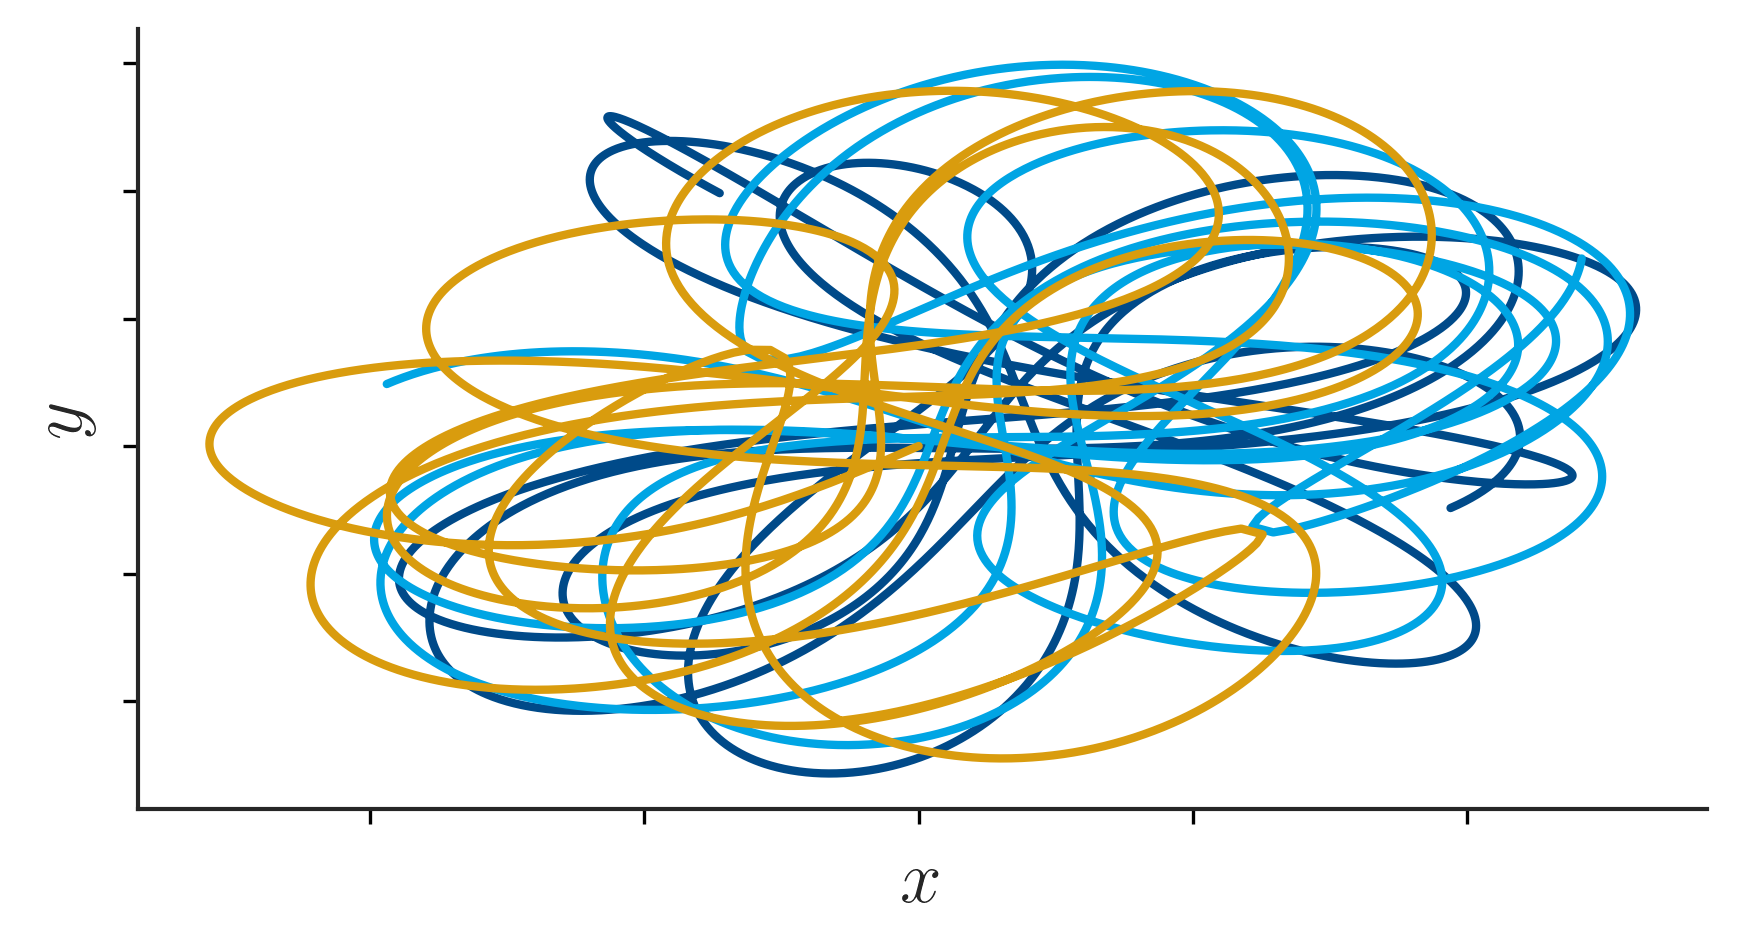

In [28]:
%matplotlib inline

with sns.axes_style('white'):
    with plt.style.context('./plotstyle_presentation.mplstyle'):
        fig, ax = plt.subplots()
        ax.plot(*r1.T)
        ax.plot(*r2.T)
        ax.plot(*r3.T)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_ylabel(r'$y$')
        ax.set_xlabel(r'$x$')

        print(ax.get_xlim())
        print(ax.get_ylim())

In [23]:
dhsic = DHSIC()
system_state = np.array([r1, v1, r2, v2, r3, v3])
dhsic_metric = dhsic(system_state)

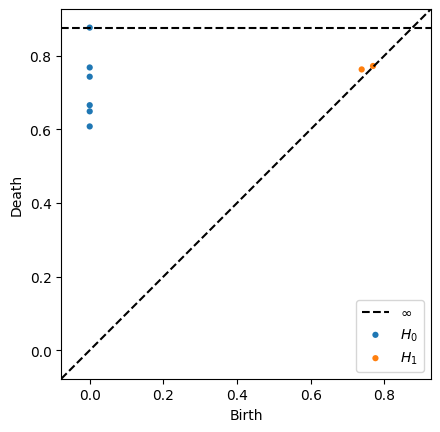

In [24]:
r = ripser(dhsic_metric, distance_matrix=True, do_cocycles=True)
plot_diagrams(r['dgms'], show=True)

In [92]:
def create_three_body_animation(trajectories: np.ndarray, filename: Path, N: int=500, fps: int=30, state_space_on: bool=True) -> None:
    with sns.axes_style('white'):
        with plt.style.context('./plotstyle_presentation.mplstyle'):

            # Get the default color cycle specified in the loaded style sheet
            prop_cycle = plt.rcParams['axes.prop_cycle']

            # Extract the colors from the cycle
            colors = prop_cycle.by_key()['color']

            # Get the first three colors
            c1, c2, c3 = colors[:3]

            r1 = trajectories[:, 0:2]
            #v1 = trajectories[:, 2:4]
            r2 = trajectories[:, 4:6]
            #v2 = trajectories[:, 6:8]
            r3 = trajectories[:, 8:10]
            #v3 = trajectories[:, 10:12]

            N_frames = len(r1) # number of frames


            fig, ax = plt.subplots()
            if state_space_on:
                ax.plot(*r1.T, ":", color=c1, linewidth=0.7, zorder=1, alpha=0.5)
                ax.plot(*r2.T, ":", color=c2, linewidth=0.7, zorder=1, alpha=0.5)
                ax.plot(*r3.T, ":", color=c3, linewidth=0.7, zorder=1, alpha=0.5)


            point_r1, = ax.plot([], [], marker='o', markersize=5, color=c1, zorder=3)
            point_r2, = ax.plot([], [], marker='o', markersize=5, color=c2, zorder=3)
            point_r3, = ax.plot([], [], marker='o', markersize=5, color=c3, zorder=3)

            
            # Create LineCollections for trails (one per body)
            trail_r1 = LineCollection([], linewidths=2, zorder=2)
            trail_r2 = LineCollection([], linewidths=2, zorder=2)
            trail_r3 = LineCollection([], linewidths=2, zorder=2)
            ax.add_collection(trail_r1)
            ax.add_collection(trail_r2)
            ax.add_collection(trail_r3)

            def get_fading_segments(positions, color, N):
                    start = max(0, len(positions) - N)
                    pts = positions[start:]
                    if len(pts) < 2:
                        return [], []
                    segments = np.stack([pts[:-1], pts[1:]], axis=1)
                    alphas = np.linspace(0.1, 1.0, len(segments))
                    rgb = mpl_clrs.to_rgb(color)
                    rgba = np.tile(rgb, (len(segments), 1))
                    rgba = np.concatenate([rgba, alphas[:, None]], axis=1)
                    return segments, rgba
            
            def init():
                ax.set_xlim(-2.0, 2.0)
                ax.set_ylim(-2.0, 2.0)
                ax.set_aspect('equal', 'box')
                ax.set_xticklabels([])
                ax.set_yticklabels([])
                ax.set_ylabel(r'$y$')
                ax.set_xlabel(r'$x$')

                point_r1.set_data([], [])
                point_r2.set_data([], [])
                point_r3.set_data([], [])
                
                trail_r1.set_segments([])
                trail_r2.set_segments([])
                trail_r3.set_segments([])

                fig.tight_layout()
                return point_r1, point_r2, point_r3, trail_r1, trail_r2, trail_r3


            def update(frame):
                
                segs1, trail_colors1 = get_fading_segments(r1[frame-N:frame], c1, N)
                segs2, trail_colors2 = get_fading_segments(r2[frame-N:frame], c2, N)
                segs3, trail_colors3 = get_fading_segments(r3[frame-N:frame], c3, N)
                trail_r1.set_segments(segs1)
                trail_r2.set_segments(segs2)
                trail_r3.set_segments(segs3)
                trail_r1.set_color(trail_colors1)
                trail_r2.set_color(trail_colors2)
                trail_r3.set_color(trail_colors3)

                point_r1.set_data([r1[frame, 0]],[r1[frame, 1]])
                point_r2.set_data([r2[frame, 0]],[r2[frame, 1]])
                point_r3.set_data([r3[frame, 0]],[r3[frame, 1]])
                return point_r1, point_r2, point_r3, trail_r1, trail_r2, trail_r3


            ani = FuncAnimation(
                fig, 
                update,
                frames=np.arange(N, N_frames), # adjusting to trail length that is supposed to be shown
                init_func=init,
                blit=True,
                interval=50,
            )

            # save as mp4 animation
            mp4_filename = filename.parent / filename.stem
            mp4_filename = mp4_filename.with_suffix('.mp4')
            ani.save(mp4_filename, writer='ffmpeg', fps=fps)


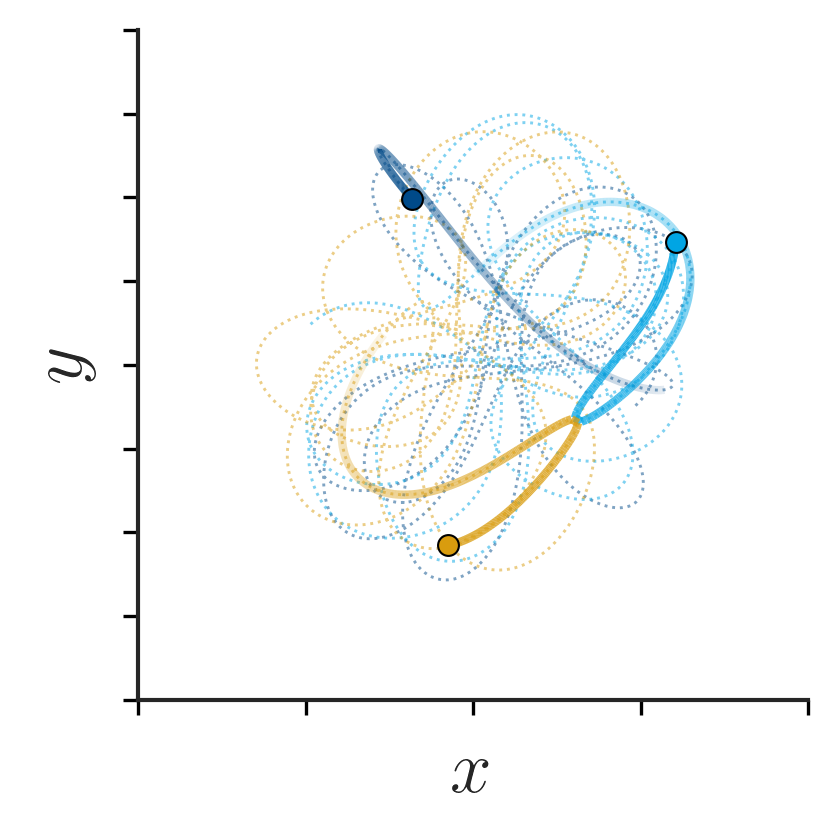

In [94]:
animation_filename = Path("./animations/three_body_unstable.mp4")
create_three_body_animation(trajectories, animation_filename, fps=100, N=500)

SyntaxError: incomplete input (3269434124.py, line 2)